In [2]:
#Pilih Variabel Target yaitu Total
import pandas as pd
import os
# Pakai dataframe hasil EDA yang tersimpan di data/precessed/data_eda.csv
file_path = os.path.join('..', 'data', 'processed', 'data_eda.csv')
df = pd.read_csv(file_path)
target_variable = 'Total'
print(f'Variabel target yang dipilih: {target_variable}')
df[target_variable].head(5)


Variabel target yang dipilih: Total


0    11104693
1    10932000
2    10547917
3    10011142
4     9427590
Name: Total, dtype: int64

In [3]:
predictor_variables = ['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK', 'Tanggal_Gabungan']
print(f'Variabel prediktor yang dipilih: {predictor_variables}')
df[predictor_variables].head(5)

Variabel prediktor yang dipilih: ['Tidak/belum pernah sekolah', 'Tidak/belum tamat SD', 'SLTP', 'Akademi/Diploma', 'SLTA Kejuruan/SMK', 'Tanggal_Gabungan']


,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SLTP,Akademi/Diploma,SLTA Kejuruan/SMK,Tanggal_Gabungan
0,234465,614960,2860007,297185,1204140,2006-02-01
1,170666,611254,2730045,278074,1305190,2006-08-01
2,145750,520316,2643062,330316,1114675,2007-02-01
3,94301,438519,2264198,397191,1538349,2007-08-01
4,79764,448431,2166619,519867,1165582,2008-02-01


In [5]:
# buat standarisasi dan perhatikan eror ValueError: Found input variables with inconsistent numbers of samples: [37, 35]
from sklearn.preprocessing import StandardScaler

df['Tanggal_Gabungan'] = pd.to_datetime(df['Tanggal_Gabungan'], errors='coerce')
df['year'] = df['Tanggal_Gabungan'].dt.year
df['month'] = df['Tanggal_Gabungan'].dt.month
df = df.drop(columns=['Tanggal_Gabungan'])

X = df.select_dtypes(include=[float, int])

X_scaled = StandardScaler().fit_transform(X)


In [7]:
# split data
from sklearn.model_selection import train_test_split
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


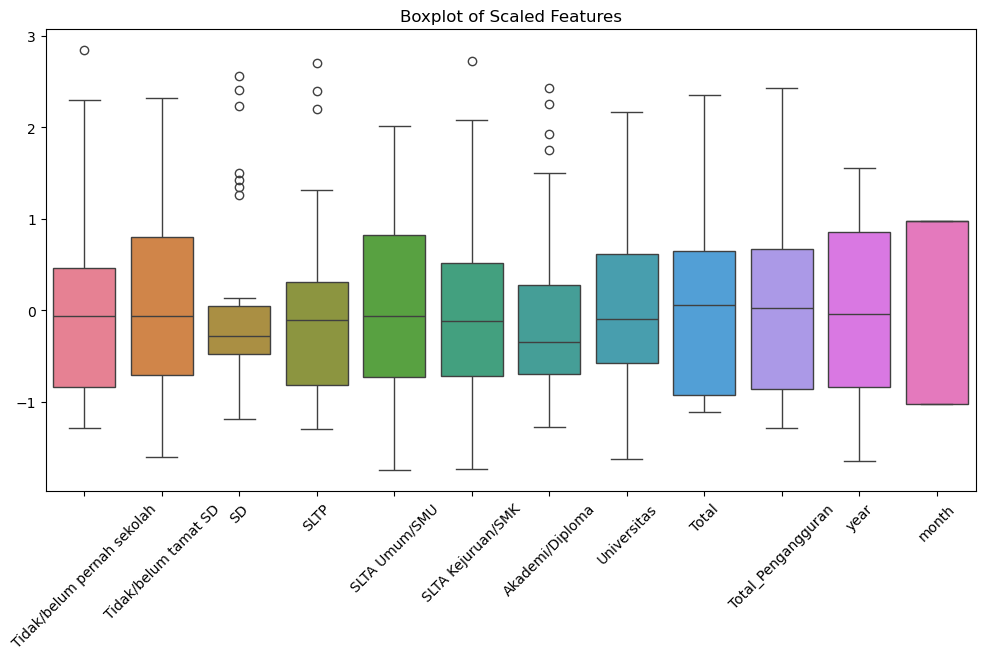

In [8]:
# Visualisasi distribusi data setelah scaling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_df)
plt.title('Boxplot of Scaled Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# simpan data hasil preprocessing di data/processed
output_path = os.path.join('..', 'data', 'processed', 'data_preprocessed.csv')
preprocessed_df = pd.DataFrame(X_scaled, columns=X.columns)
preprocessed_df[target_variable] = y.values
preprocessed_df.to_csv(output_path, index=False)
print(f'Data hasil preprocessing disimpan di: {output_path}')